In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS red arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.604.Red.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,Slit,X,Y,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1,1,199.81,19.6,604R1_778-001004.xlsx,6560.006,0.419,3.152,0.760,-19.79,...,6.9110,9.8280,6724.307,1.618,2.765,2.312,-3.363,3.125,-9.896,-12.140
1,2,1,198.47,19.6,604R1_778-005008.xlsx,6559.806,0.427,3.849,1.260,-18.81,...,1.5190,0.0000,6726.936,0.812,2.295,1.196,4.827,3.316,11.790,8.589
2,3,1,197.13,19.6,604R1_778-009012.xlsx,6565.844,6.249,28.117,18.167,-16.44,...,-7.2300,-6.1340,6723.383,0.606,1.294,0.730,2.938,4.510,4.045,7.195
3,4,1,195.79,19.6,604R1_778-013016.xlsx,6563.614,1.206,22.266,4.208,-14.54,...,-0.1011,-0.5723,6725.799,0.636,1.021,0.724,-8.003,6.818,-8.701,-7.102
4,5,1,194.45,19.6,604R1_778-017020.xlsx,6560.380,0.479,3.310,0.990,-16.68,...,-20.7700,-12.5400,6728.612,0.685,3.266,1.290,-4.778,3.152,-16.610,-9.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,10,5.36,0.0,604R10_796-581584.xlsx,6562.497,1.075,25.496,4.464,-16.81,...,12.7500,4.8210,6726.949,0.155,0.835,0.259,-6.647,4.902,-5.906,-4.347
1496,147,10,4.02,0.0,604R10_796-585588.xlsx,6559.596,0.502,2.088,1.022,-14.64,...,-32.3900,-237.2000,6732.367,0.000,0.196,0.000,8.149,0.000,1.704,4.226
1497,148,10,2.68,0.0,604R10_796-589592.xlsx,6555.097,0.403,1.710,0.586,-13.80,...,-34.2900,-13.9000,6730.058,1.412,7.141,3.258,3.012,1.870,22.900,19.520
1498,149,10,1.34,0.0,604R10_796-593596.xlsx,6559.274,0.471,2.991,0.726,-17.67,...,8.3980,12.5800,6728.062,1.317,3.541,2.472,3.947,3.851,14.880,11.680


In [3]:
i=3#[SII]6717
Dt1=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt1=pd.DataFrame(Dt1).T
Dt1.describe()

,X,Y,Center.3,ErrC.3,Width.3,ErrW.3,Peak.3,ErrP.3,Line.3,ErrL.3
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000
mean,99.905000,9.390000,6599.151797,0.561681,0.905943,1.369392,103.285815,46.883946,27.948030,-4.639286
std,58.085176,6.252917,859.424825,3.647559,15.027260,10.405934,217.224498,1254.124011,3062.944994,778.937267
min,0.000000,0.000000,0.000000,0.000000,-265.259000,0.000000,-695.300000,0.000000,-115100.000000,-17360.000000
25%,49.620000,4.000000,6710.520750,0.016000,0.768500,0.039000,2.154750,3.498000,1.654750,2.232000
50%,99.905000,9.000000,6710.789000,0.099500,0.996000,0.233000,16.005000,4.985000,17.200000,5.413000
75%,150.190000,15.000000,6711.182250,0.330250,1.619250,0.633750,115.350000,6.177500,120.100000,7.225000
max,199.810000,19.600000,6727.958000,102.063000,292.332000,250.531000,2329.000000,48420.000000,25620.000000,20770.000000


In [4]:
i=4#[SII]6731
Dt2=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt2=pd.DataFrame(Dt2).T
Dt2.describe()

,X,Y,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.00000,1.500000e+03,1.499000e+03
mean,99.905000,9.390000,6613.311696,0.561681,0.905943,1.369392,1.926000e+12,15.39419,-1.110000e+11,-5.937291e+09
std,58.085176,6.252917,861.268898,3.647559,15.027260,10.405934,7.459366e+13,343.88755,4.299012e+12,2.298736e+11
min,0.000000,0.000000,0.000000,0.000000,-265.259000,0.000000,-6.323000e+05,0.00000,-1.665000e+14,-8.900000e+12
25%,49.620000,4.000000,6724.920750,0.016000,0.768500,0.039000,1.092250e+00,3.33100,1.316750e+00,2.400500e+00
50%,99.905000,9.000000,6725.189000,0.099500,0.996000,0.233000,1.099000e+01,4.67850,1.335500e+01,5.090000e+00
75%,150.190000,15.000000,6725.582250,0.330250,1.619250,0.633750,8.305000e+01,5.90125,8.696500e+01,6.941000e+00
max,199.810000,19.600000,6742.358000,102.063000,292.332000,250.531000,2.889000e+15,13300.00000,3.533000e+06,1.128000e+06


[SII]6717

Peak

(0.0, 150.0, 0.0, 10.0)

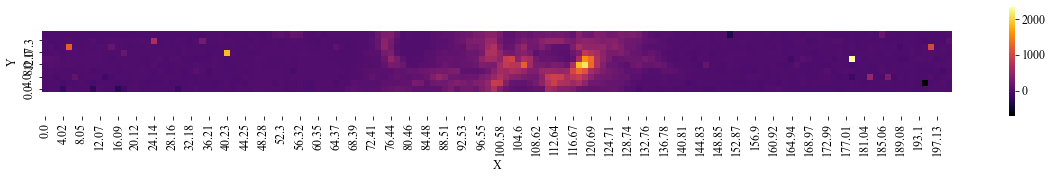

In [5]:
data_P=(Dt1.round(2)).pivot(index='Y', columns='X', values='Peak.3')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 60.0, 0.0, 10.0)

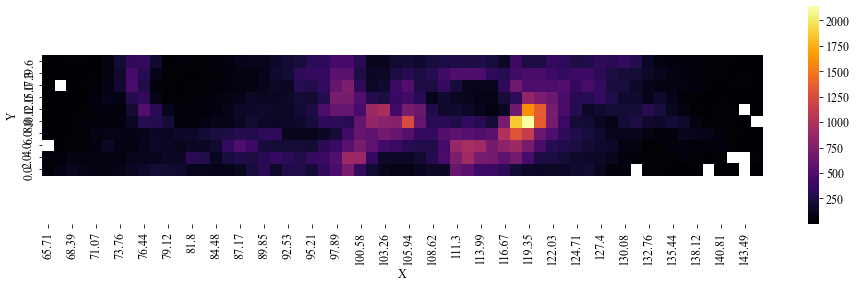

In [6]:
mP1=(Dt1.X>65)&(Dt1.X<145)&(Dt1["Peak.3"]>0)
data_P1=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='Peak.3')#TableFormat

sz=4
wd=Dt1[mP1].X.max()-Dt1[mP1].X.min()
hd=Dt1[mP1].Y.max()-Dt1[mP1].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P1, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [7]:
l=[6716.5]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt1["Center.3"]-l)/l
RV=RVo+corrhelio

Dt1=Dt1.assign(RV=RV.values)

(0.0, 60.0, 0.0, 10.0)

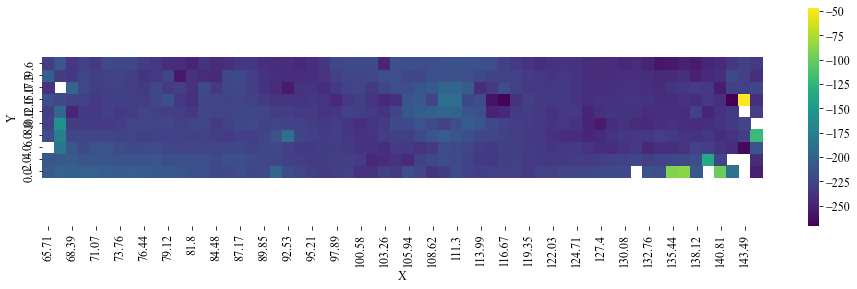

In [8]:
data_VR=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

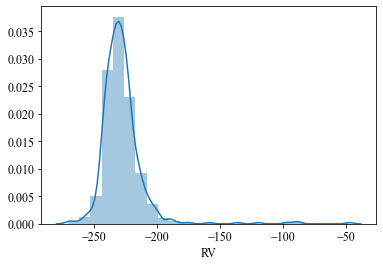

In [9]:
sns.distplot(Dt1.RV[mP1],bins=25)

In [10]:
Dt1I=Dt1[mP1]
mR1=(Dt1I.RV>-270)&(Dt1I.RV<-190)

(0.0, 60.0, 0.0, 10.0)

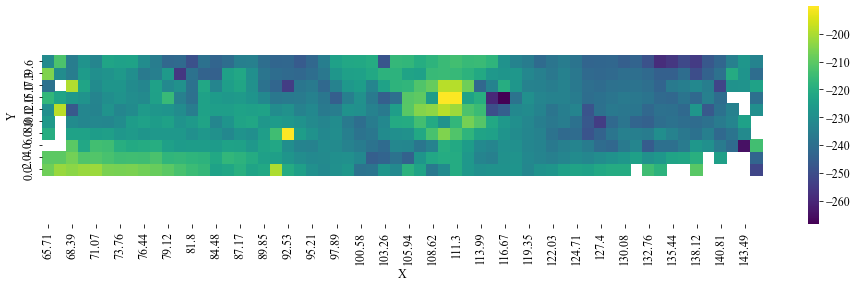

In [11]:
data_VR=(Dt1I[mR1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

Sigma

In [12]:
T=8350#K Table 5

Xw=32.065#
SI=15#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt1I["Width.3"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt1I=Dt1I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 60.0, 0.0, 10.0)

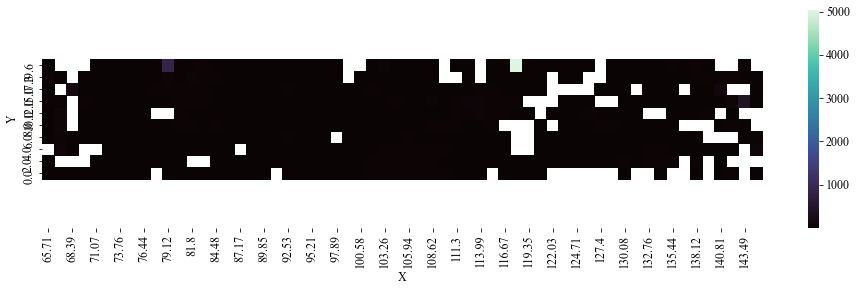

In [13]:
data_SR=(Dt1I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

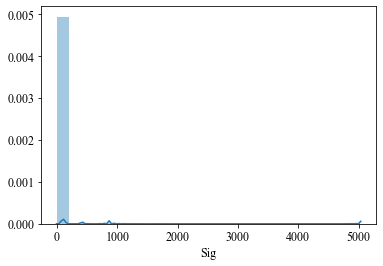

In [14]:
sns.distplot(Dt1I.Sig,bins=25)

In [15]:
Dt1II=Dt1I[mR1]
mS1=Dt1II.Sig<60

(0.0, 60.0, 0.0, 10.0)

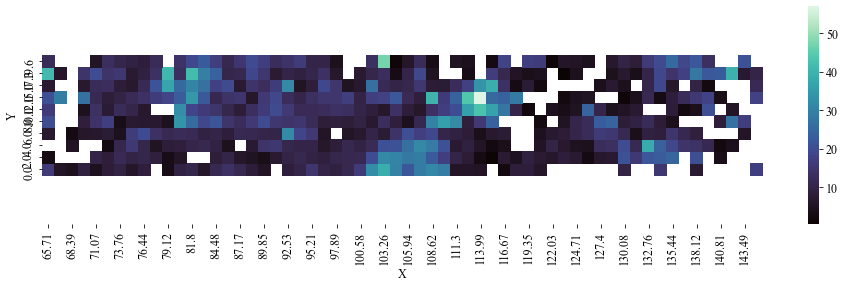

In [16]:
data_S1=(Dt1II[mS1].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_S1, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

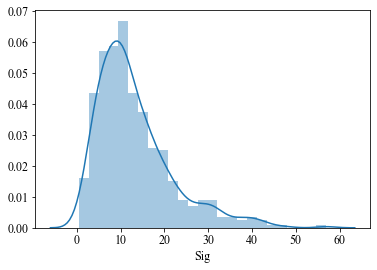

In [17]:
sns.distplot(Dt1II[mS1].Sig,bins=25)

[SII]6731

Peak

(0.0, 150.0, 0.0, 10.0)

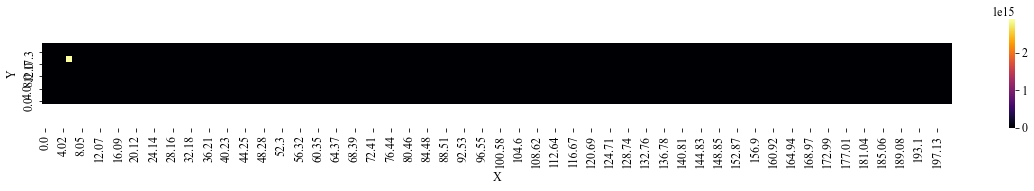

In [18]:
data_P2=(Dt2.round(2)).pivot(index='Y', columns='X', values='Peak.4')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 60.0, 0.0, 10.0)

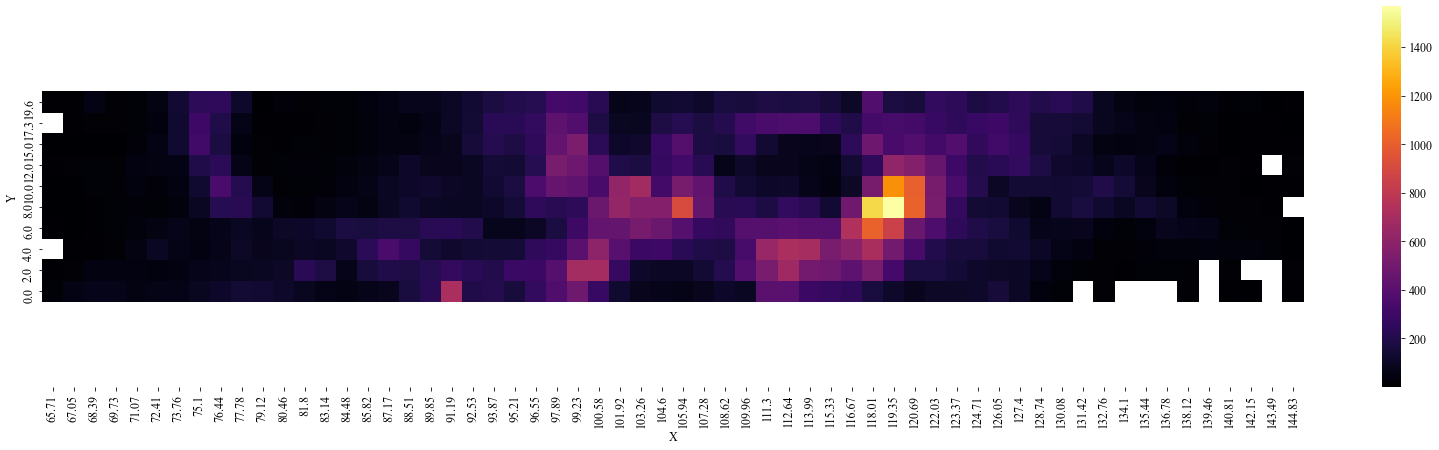

In [19]:
mP2=(Dt2.X>65)&(Dt2.X<145)&(Dt2["Peak.4"]>0)
data_P2=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='Peak.4')#TableFormat

sz=7
wd=Dt2[mP2].X.max()-Dt2[mP2].X.min()
hd=Dt2[mP2].Y.max()-Dt2[mP2].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [20]:
l=[6730.8]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt2["Center.4"]-l)/l
RV=RVo+corrhelio

Dt2=Dt2.assign(RV=RV.values)

(0.0, 60.0, 0.0, 10.0)

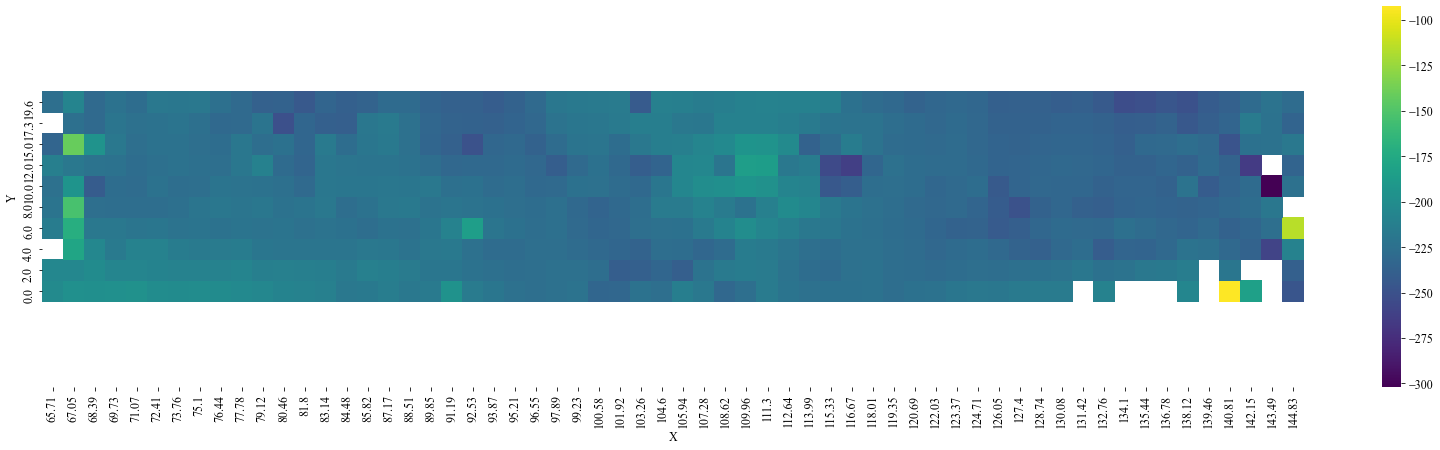

In [21]:
data_VB=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

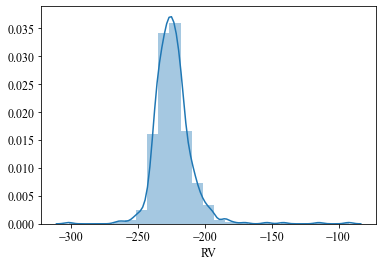

In [22]:
sns.distplot(Dt2[mP2].RV,bins=25)

In [23]:
Dt2I=Dt2[mP2]
mR2=(Dt2I.RV>-260)&(Dt2I.RV<-190)

(0.0, 60.0, 0.0, 10.0)

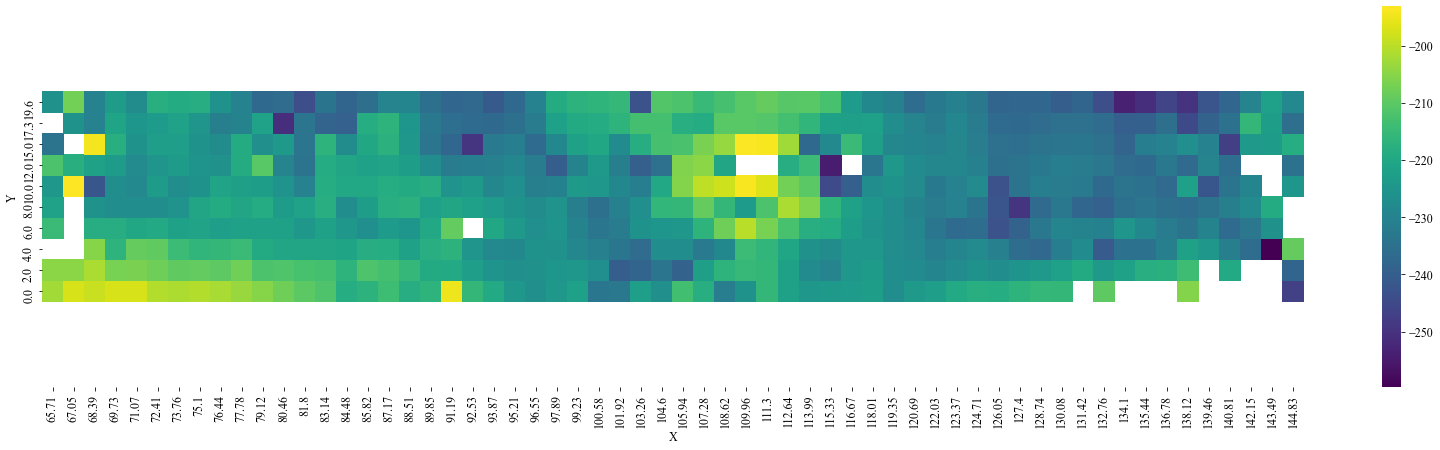

In [24]:
data_VB=(Dt2I[mR2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

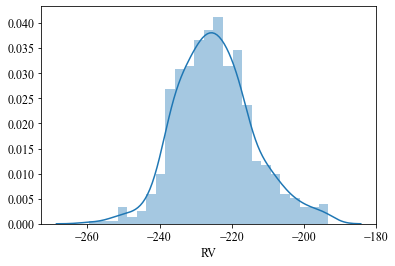

In [25]:
sns.distplot(Dt2I[mR2].RV,bins=25)

In [26]:
T=8350#K Table 5

Xw=32.065#
SI=15#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt2I["Width.4"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt2I=Dt2I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 60.0, 0.0, 10.0)

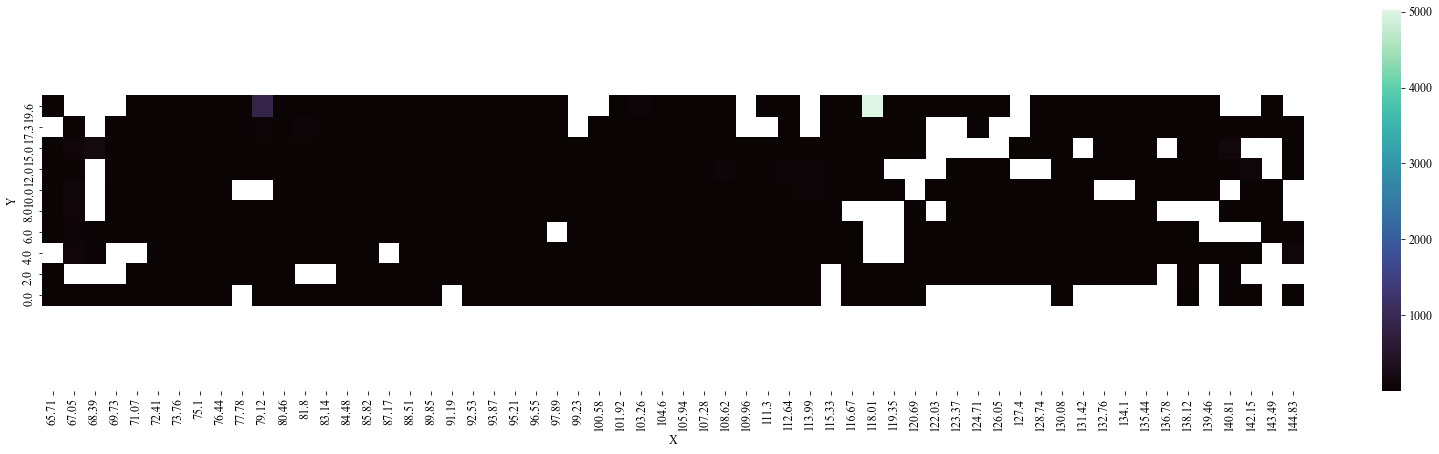

In [27]:
data_SB=(Dt2I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

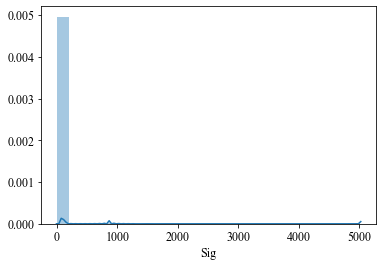

In [28]:
sns.distplot(Dt2I.Sig,bins=25)

In [29]:
Dt2II=Dt2I[mR2]
mS2=((Dt2II["Sig"]<60))

(0.0, 60.0, 0.0, 10.0)

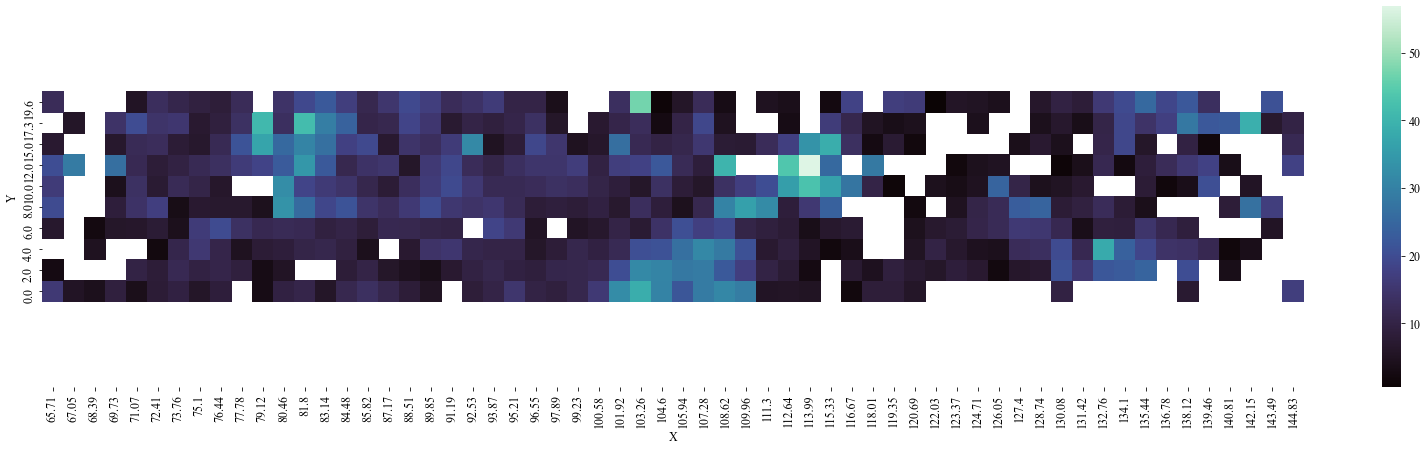

In [30]:
data_SB=(Dt2II[mS2].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

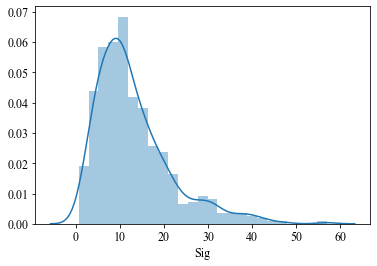

In [31]:
sns.distplot(Dt2II[mS2].Sig,bins=25)

Comparison

In [32]:
Dt1c=Dt1II[mS1]
Dt2c=Dt2II[mS2]

Peak

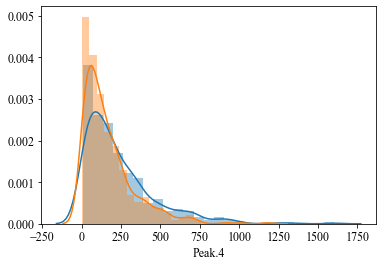

In [33]:
sns.distplot(Dt1c["Peak.3"],bins=25)
sns.distplot(Dt2c["Peak.4"],bins=25)

Normalize emission

In [34]:
PeakN=Dt1c["Peak.3"]/Dt1c["Peak.3"].max()
Dt1c=Dt1c.assign(PeakN=PeakN.values)

In [35]:
PeakN=Dt2c["Peak.4"]/Dt2c["Peak.4"].max()
Dt2c=Dt2c.assign(PeakN=PeakN.values)

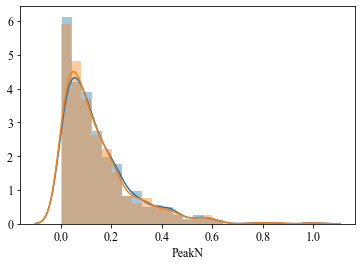

In [36]:
sns.distplot(Dt1c["PeakN"],bins=25)
sns.distplot(Dt2c["PeakN"],bins=25)

Radial Velocity

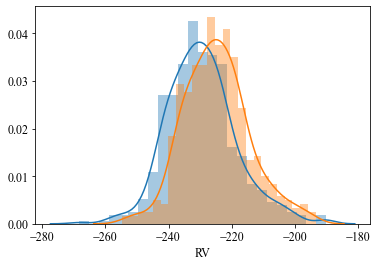

In [37]:
sns.distplot(Dt1c.RV,bins=25)
sns.distplot(Dt2c.RV,bins=25)

Sigma

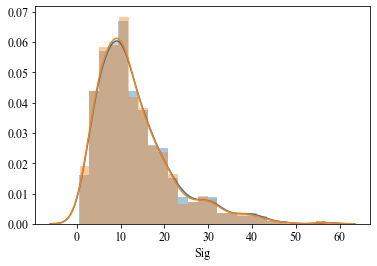

In [38]:
sns.distplot(Dt1c.Sig,bins=25)
sns.distplot(Dt2c.Sig,bins=25)

Structure Function

In [39]:
pc=4.16

1.339999999999975


[None, None]

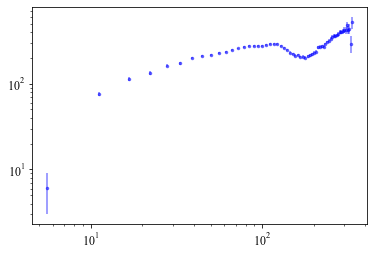

In [40]:
SF=sosf(Dt1c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [41]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt1c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([19.01386388])

In [42]:
s=SFr[0]

In [43]:
ss=np.round((Dt1c["RV"].std())**2,2)

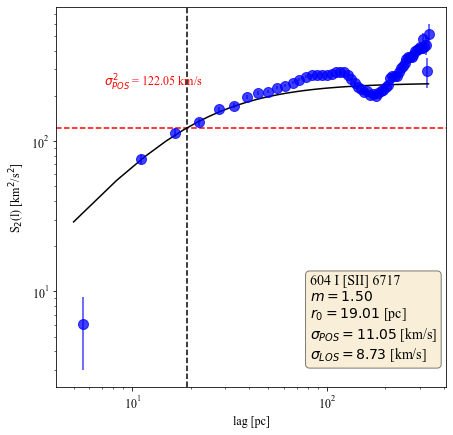

In [44]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.5

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('604 I [SII] 6717' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt1c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt1c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [45]:
SF1=SF

1.339999999999975


[None, None]

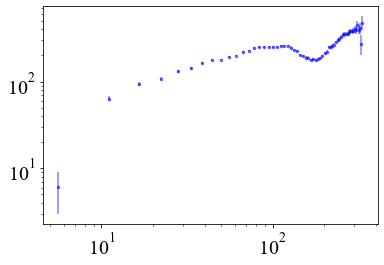

In [46]:
SF=sosf(Dt2c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [47]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt2c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([22.64845976])

In [48]:
s=SFr[0]

In [49]:
ss=np.round((Dt2c["RV"].std())**2,2)

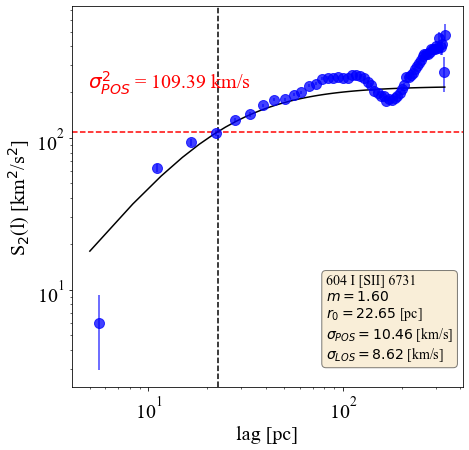

In [50]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1.6

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('604 I [SII] 6731' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt2c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt2c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [51]:
SF2=SF

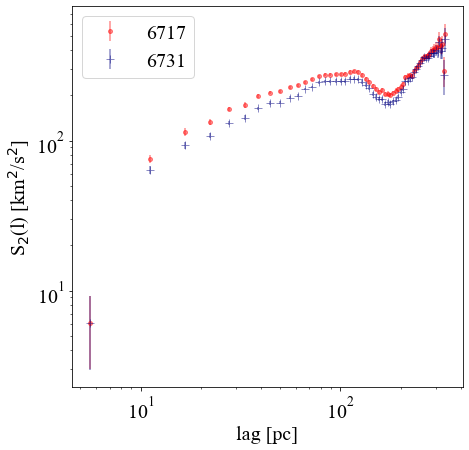

In [52]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF1.Lag,SF1.Nmqvd, yerr=SF1.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.45, markersize=8,label='6717')

ax.errorbar(SF2.Lag,SF2.Nmqvd, yerr=SF2.ErrY, marker='+', fmt=' ',color="navy", ecolor="navy",
                     alpha=0.45, markersize=8,label='6731')

plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

[Text(0, 0.5, '$σ$ [km/s]'), Text(0.5, 0, 'I')]

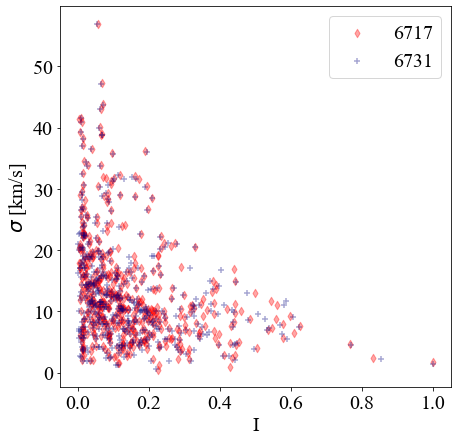

In [55]:
fig,ax=plt.subplots(figsize=(7,7))

plt.scatter(Dt1c["Peak.3"]/Dt1c["Peak.3"].max(),Dt1c["Sig"],alpha=0.35,marker='d',color="red",label='6717')
plt.scatter(Dt2c["Peak.4"]/Dt2c["Peak.4"].max(),Dt2c["Sig"],alpha=0.35,marker='+',color="navy",label='6731')
plt.legend()
ax.set(xlabel='I', ylabel='$σ$ [km/s]')

In [54]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 37.560959339141846 seconds ---
